<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/causal_dags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

In [2]:
def get_data():
# Generate data
  np.random.seed(42)  # For reproducibility
  n = 10000
  female = np.random.rand(n) >= 0.5
  female = female.astype(int)
  ability = np.random.randn(n)
  discrimination = female
  occupation = 1 + 2 * ability + 0 * female - 2 * discrimination + np.random.randn(n)
  wage = 1 - 1 * discrimination + 1 * occupation + 2 * ability + np.random.randn(n)

  # Create DataFrame
  data = pd.DataFrame({
      'female': female,
      'ability': ability,
      'discrimination': discrimination,
      'occupation': occupation,
      'wage': wage
  })
  return data




In [3]:
df = get_data()

In [4]:
df.head()

,female,ability,discrimination,occupation,wage
0,0,-1.487862,0,-2.591872,-3.783913
1,1,-1.125186,1,-3.643047,-5.885880
2,1,0.388819,1,-1.254189,0.178262
3,1,-1.173873,1,-4.236999,-7.599063
4,0,1.112634,0,3.659646,7.028300


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
feats_to_plot = ['ability', 'discrimination', 'occupation', 'wage']

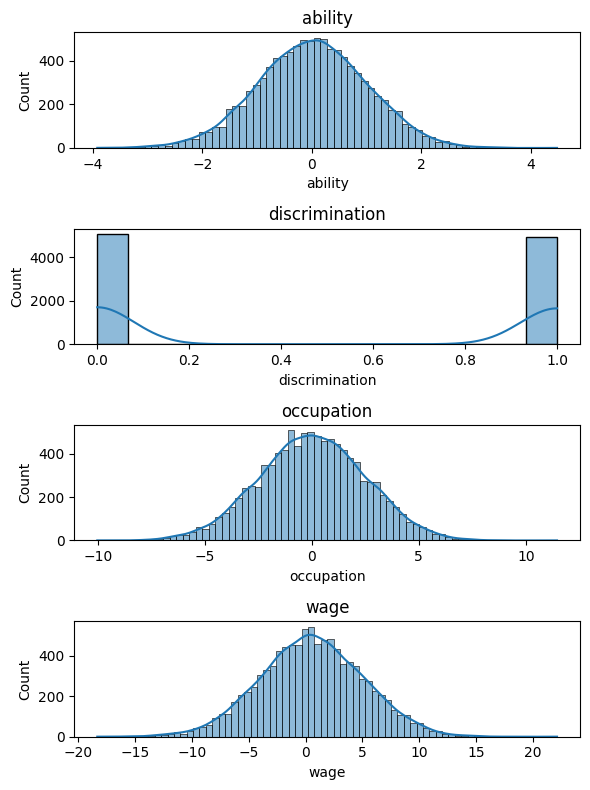

In [7]:
fig, ax = plt.subplots(len(feats_to_plot), figsize=(6, 8))
for a, feat in zip(ax, feats_to_plot):
    sns.histplot(df[feat], ax=a, kde=True)
    a.set_title(feat)

plt.tight_layout()
plt.show()



In [8]:
regs = {
    'female': 'wage ~ female',
    'ability': 'wage ~ ability',
    'discrimination': 'wage ~ discrimination',
    'occupation': 'wage ~ occupation',
    'female_occupation': 'wage ~ female + occupation',
    'female_discrimination': 'wage ~ female + discrimination',
    'female_ability_occupation': 'wage ~ female + ability + occupation '
}

In [9]:
results = {name: ols(reg, data=df).fit() for name, reg in regs.items()}

In [10]:
with open('results.txt', 'w') as f:
    for name, result in results.items():
        f.write(f"{name}\n")
        f.write(f"{result.summary()}\n")

confounding variables(STAR IS BORN)

In [3]:
star_is_born = pd.DataFrame({
    'beauty' : np.random.normal(size=2500),
    'talent' : np.random.normal(size=2500)
})

,beauty,talent
0,-1.031777,0.132162
1,0.002606,0.472316
2,1.353524,-0.239060
3,0.592764,0.465639
4,0.640404,1.251078


In [5]:
star_is_born['score'] = star_is_born['beauty'] + star_is_born['talent']
star_is_born['c85'] = star_is_born.score.quantile(0.85)
star_is_born['star'] = star_is_born.score > star_is_born.c85

In [6]:
star_is_born.star.value_counts()

,count
star,
False,2125
True,375


In [10]:
lm = "beauty ~ talent"
model = smf.ols(lm, data=star_is_born).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8762
Date:                Mon, 17 Mar 2025   Prob (F-statistic):              0.349
Time:                        10:18:31   Log-Likelihood:                -3569.5
No. Observations:                2500   AIC:                             7143.
Df Residuals:                    2498   BIC:                             7155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0108      0.020     -0.533      0.594      -0.050       0.029
talent         0.0185      0.020      0.936      0.349      -0.020       0.057
==============================================================================
Omnibus:                        5.584   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.738
Skew:                          -0.083   Prob(JB):                       0.0568
Kurtosis:                       3.166   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

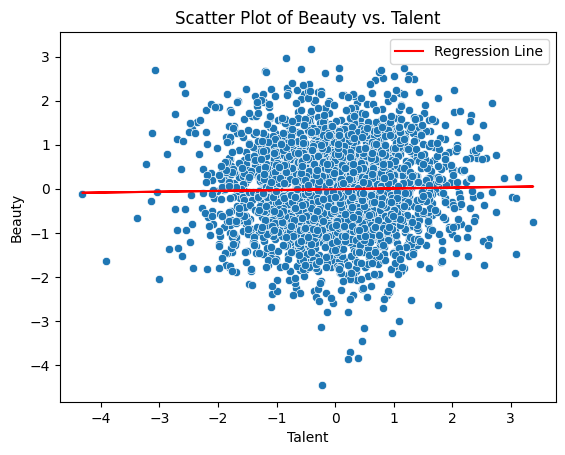

In [14]:
sns.scatterplot(x=star_is_born['talent'], y=star_is_born['beauty'])
plt.plot(star_is_born['talent'], model.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Talent')
plt.ylabel('Beauty')
plt.title('Scatter Plot of Beauty vs. Talent')
plt.legend()
plt.show()

In [15]:
star_df = star_is_born[star_is_born['star'] == True]
not_star_df = star_is_born[star_is_born['star'] == False]

In [16]:
model2 = smf.ols(lm, data=star_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     333.1
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.24e-53
Time:                        10:27:33   Log-Likelihood:                -306.52
No. Observations:                 375   AIC:                             617.0
Df Residuals:                     373   BIC:                             624.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8419      0.050     36.865      0.000       1.744       1.940
talent        -0.6601      0.036    -18.250      0.000      -0.731      -0.589
==============================================================================
Omnibus:                       35.942   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.728
Skew:                           0.776   Prob(JB):                     3.20e-10
Kurtosis:                       3.625   Cond. No.                         3.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

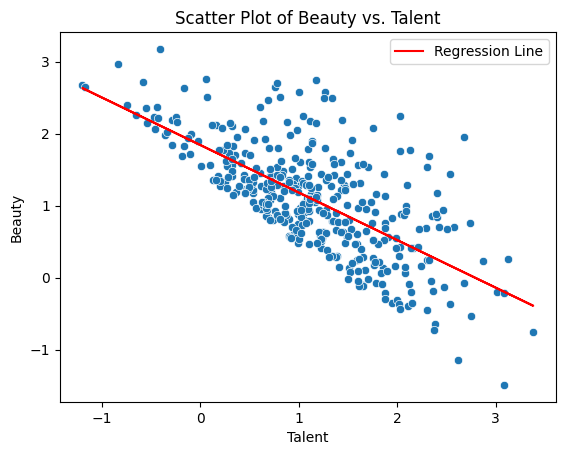

In [19]:
sns.scatterplot(x=star_df['talent'], y=star_df['beauty'])
plt.plot(star_df['talent'], model2.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Talent')
plt.ylabel('Beauty')
plt.title('Scatter Plot of Beauty vs. Talent')
plt.legend()
plt.show()

In [20]:
model3 = smf.ols(lm, data=not_star_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     94.61
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           6.60e-22
Time:                        10:29:49   Log-Likelihood:                -2790.2
No. Observations:                2125   AIC:                             5584.
Df Residuals:                    2123   BIC:                             5596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2554      0.020    -12.660      0.000      -0.295      -0.216
talent        -0.2083      0.021     -9.727      0.000      -0.250      -0.166
==============================================================================
Omnibus:                       42.963   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.528
Skew:                          -0.335   Prob(JB):                     1.30e-10
Kurtosis:                       3.254   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

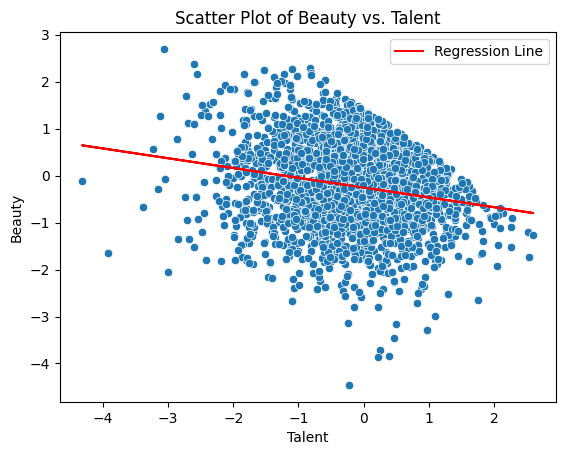

In [21]:
sns.scatterplot(x=not_star_df['talent'], y=not_star_df['beauty'])
plt.plot(not_star_df['talent'], model3.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Talent')
plt.ylabel('Beauty')
plt.title('Scatter Plot of Beauty vs. Talent')
plt.legend()
plt.show()

Omnibus:,5.584,Durbin-Watson:,2.029
Prob(Omnibus):,0.061,Jarque-Bera (JB):,5.738
Skew:,-0.083,Prob(JB):,0.0568
Kurtosis:,3.166,Cond. No.,1.04


In [23]:
summaries

,total,star,not_star
0,-0.0108,1.8419,-0.2554
1,0.020,0.050,0.020
2,-0.533,36.865,-12.660
3,0.594,0.000,0.000
4,-0.050,1.744,-0.295
5,0.029,1.940,-0.216
